In [1]:
import matplotlib
import numpy as np
import lcmsanalysis as la
import enzymeanalysis as da
import enzymeplots as dp
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
%matplotlib inline

## IMPORT DATA

In [3]:
with open('engineering_dataset.pickle', 'rb') as f:
    data_df = pickle.load(f)
sldf = la.lcms_df_processor(data_df, min_charges=8, min_contiguous_charges=4, max_big_peaks=1,
                      max_little_peaks=3, min_qqq_area=10000, min_qtof_area=1000)

/media/storage/EG/code/lcms-analysis/lcmsanalysis.py:386: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  grouped_df.set_value(ind, 'mod_area', mod_area+other_area)


In [4]:
sldf = sldf[sldf['media'] == 'TB']
mod_plasmids = [7060,7056,7069,7137,7138,7142,7147,7160,7169]
sldf = sldf[sldf['mod_plasmid'].isin(mod_plasmids)]

## ALANINE BLOCK SCANS (FIGURE 1d HEATMAPS AND SUPP NOTES)

/media/storage/EG/code/lcms-analysis/designeranalysis.py:150: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  extract_df.set_value(eind, 'total_area_capped', extract['total_area_capped'] + e_a)
/media/storage/EG/code/lcms-analysis/designeranalysis.py:141: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  extract_df.set_value(eind, 'mod_area_capped', e_a)
/media/storage/EG/code/lcms-analysis/designeranalysis.py:142: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  extract_df.set_value(eind, 'total_area_capped', extract['total_area_capped'] + e_a)


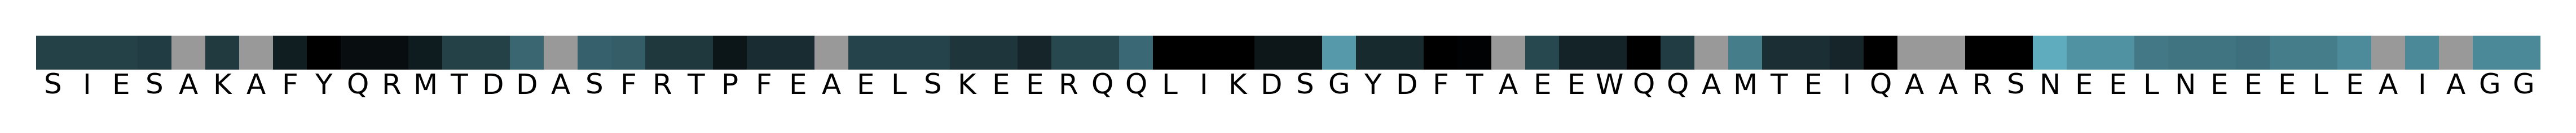

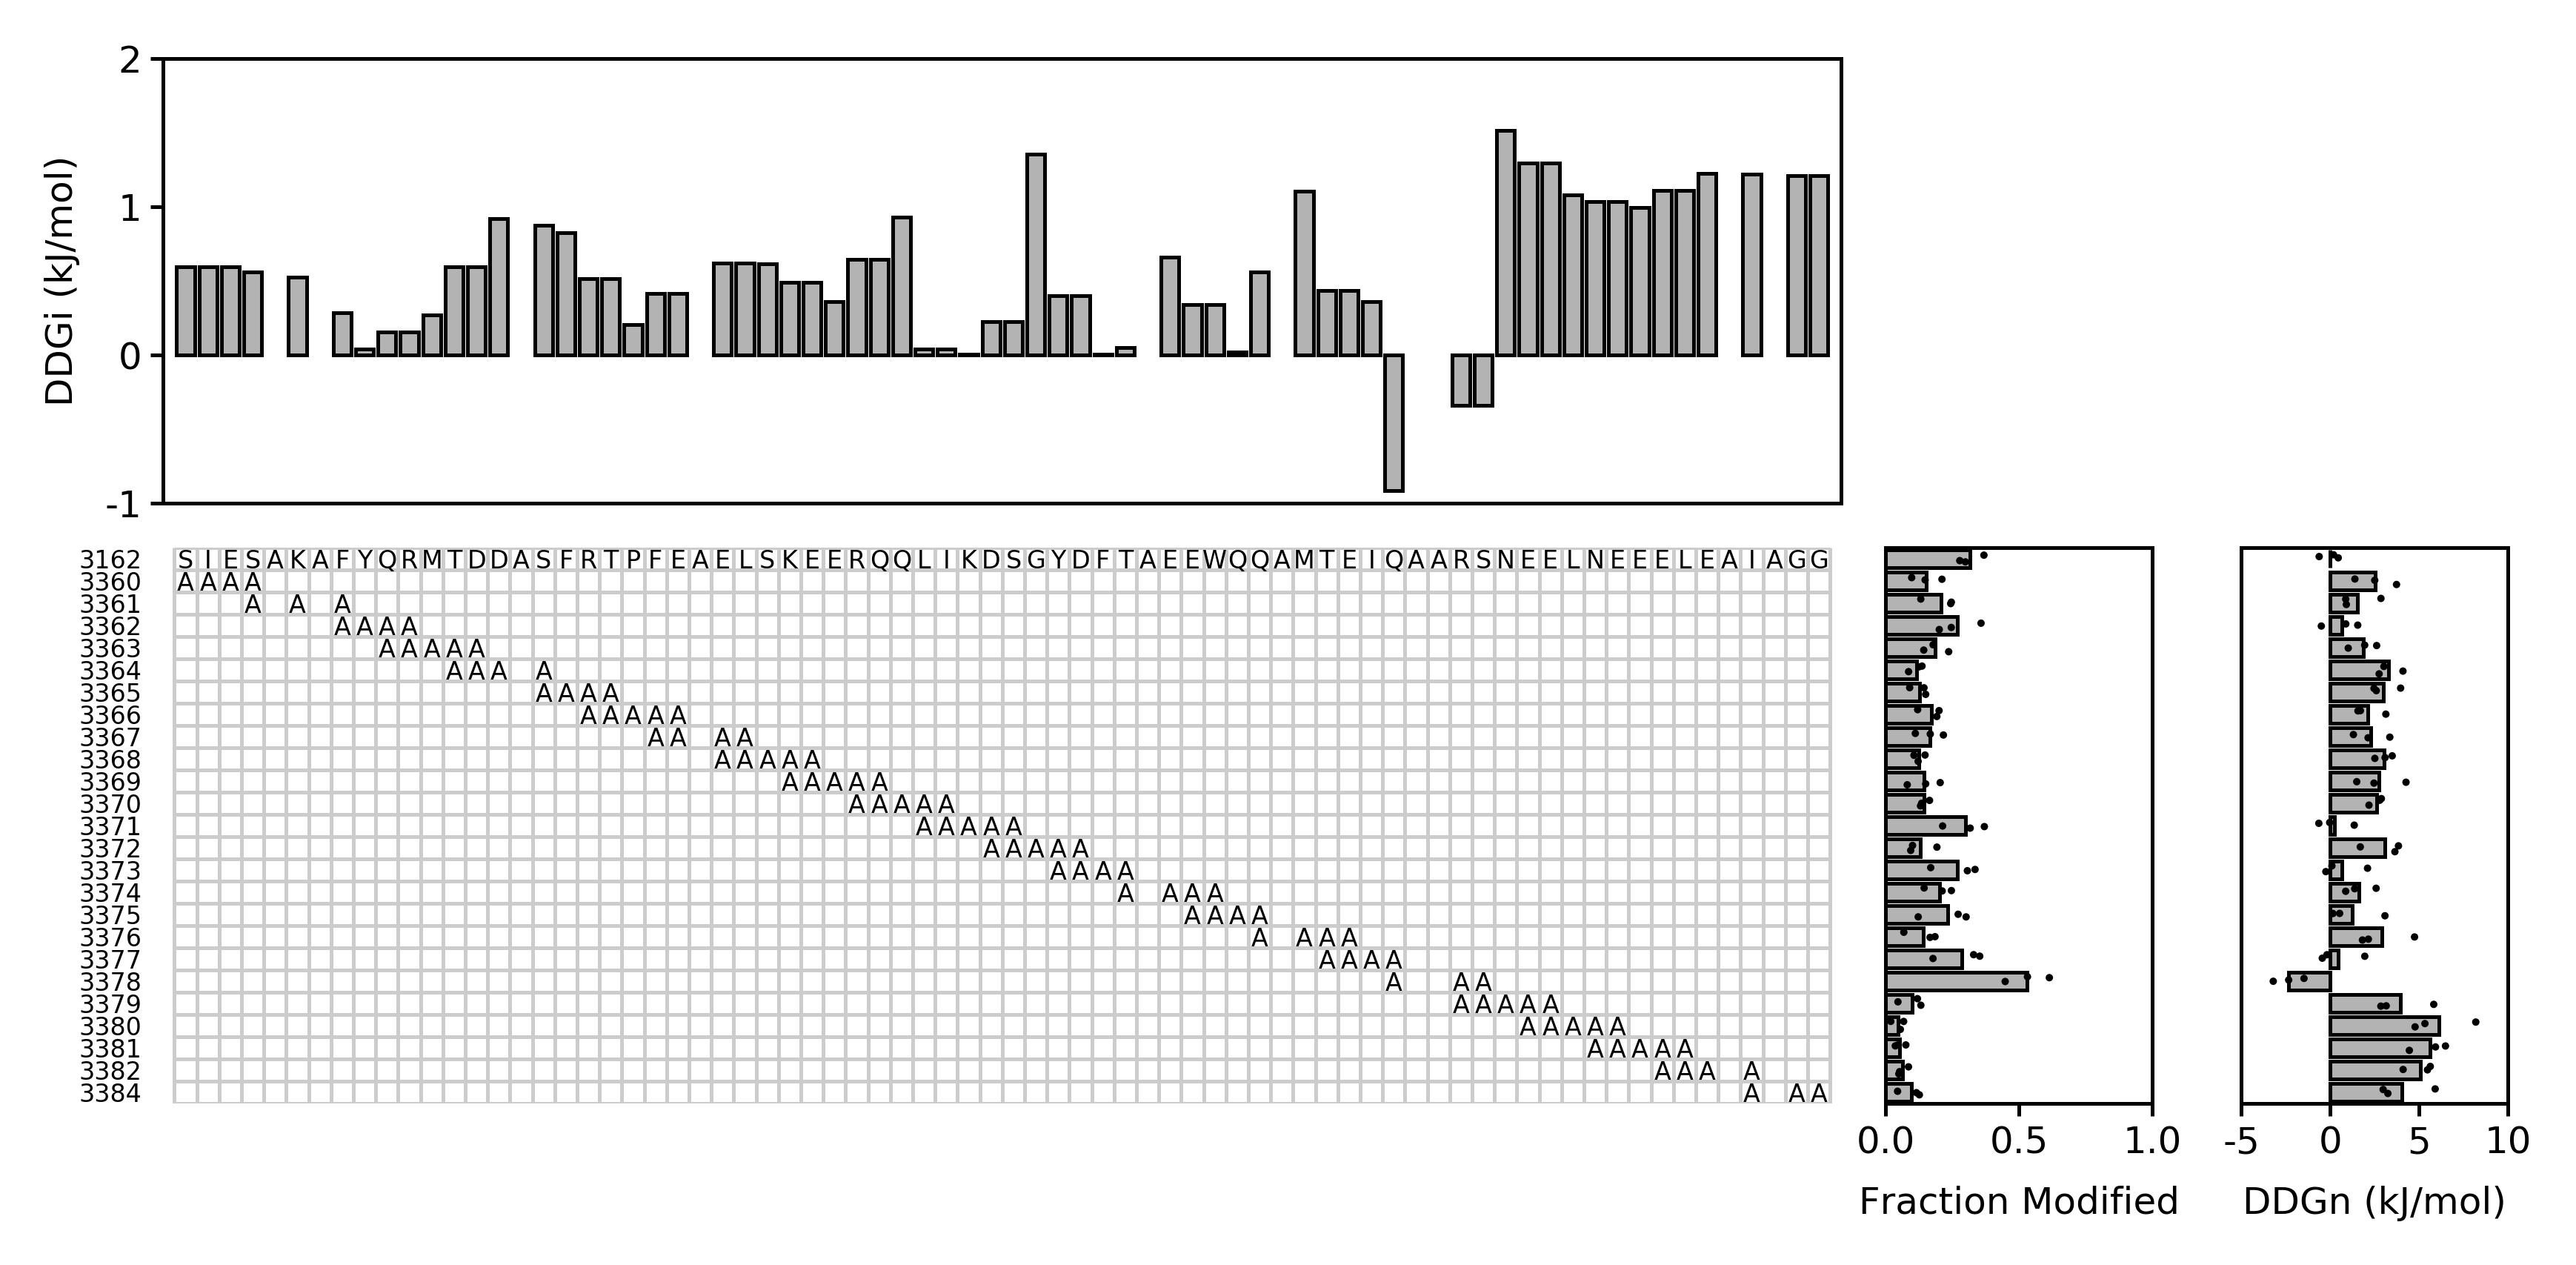

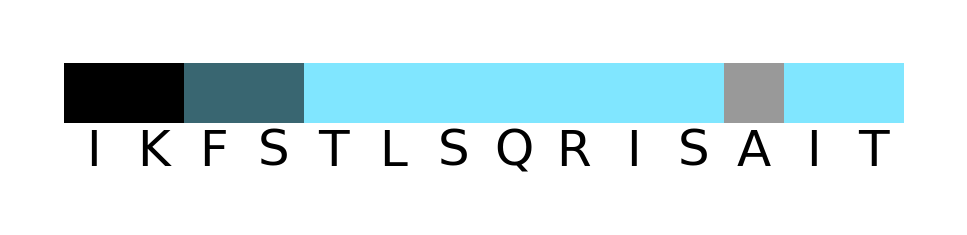

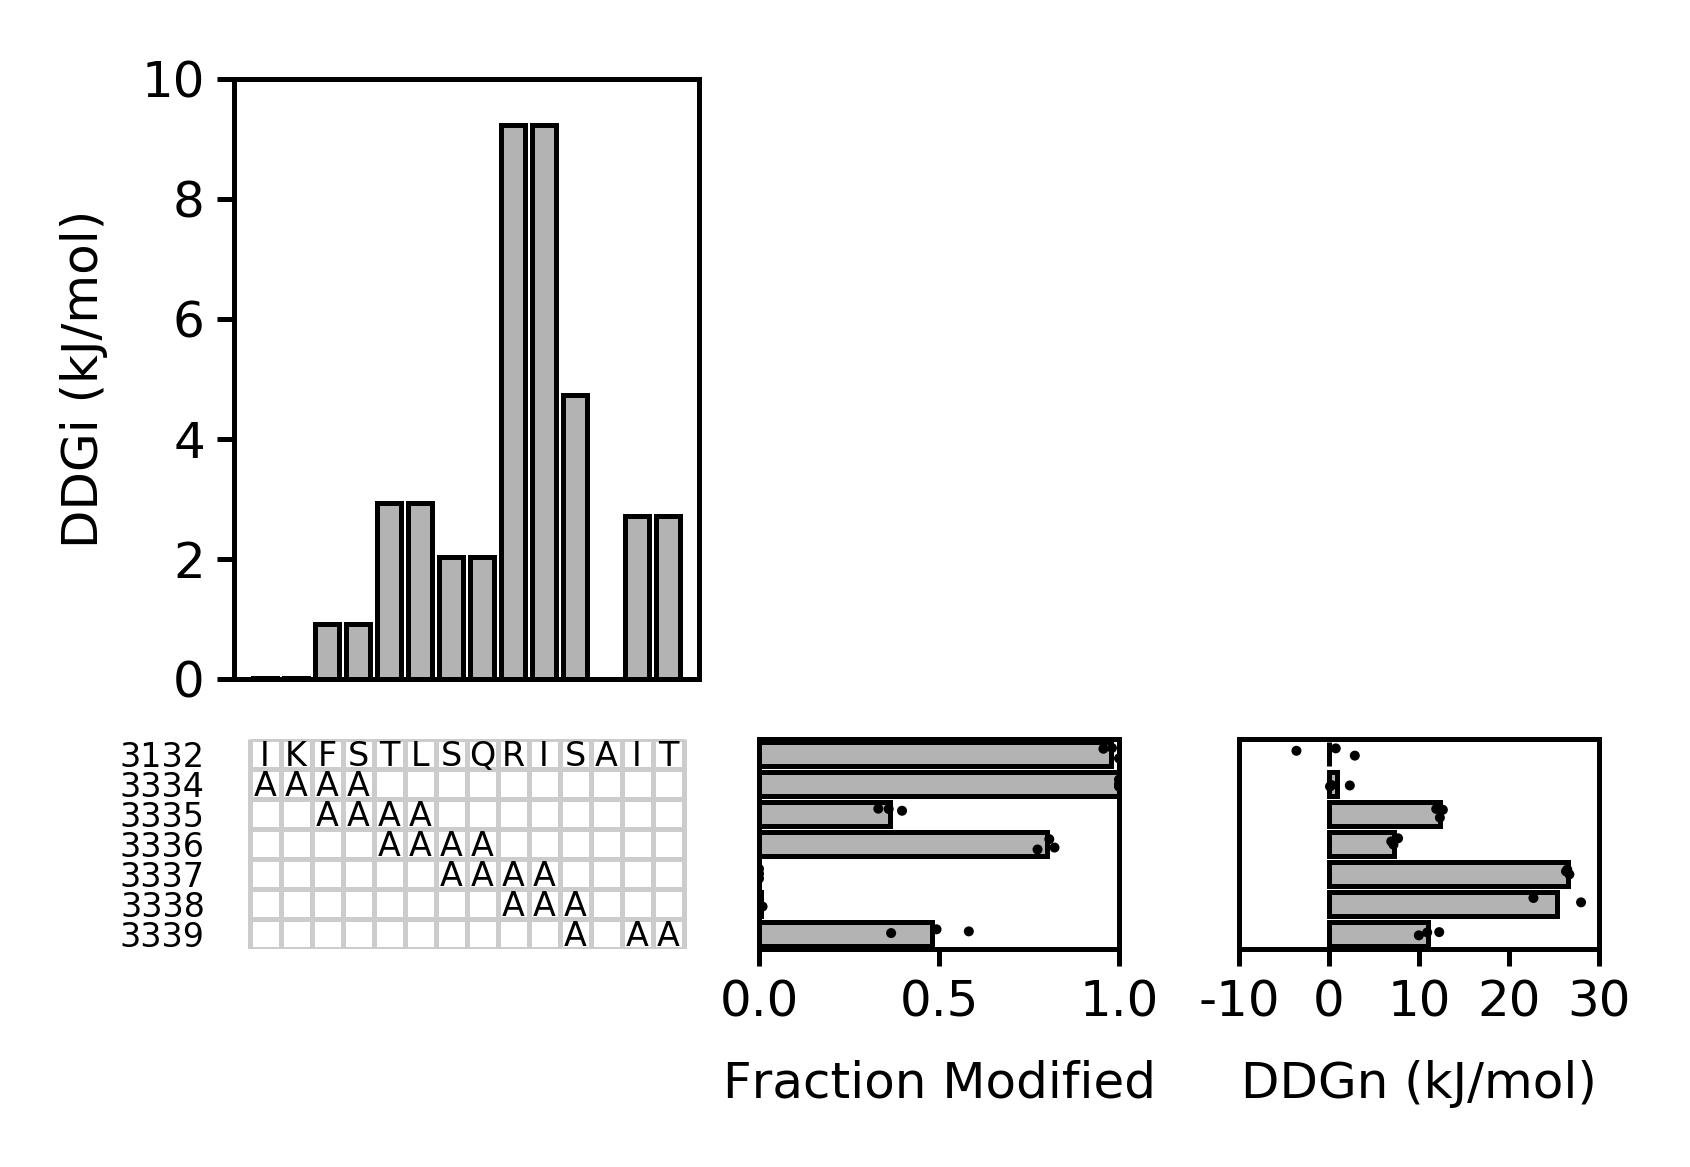

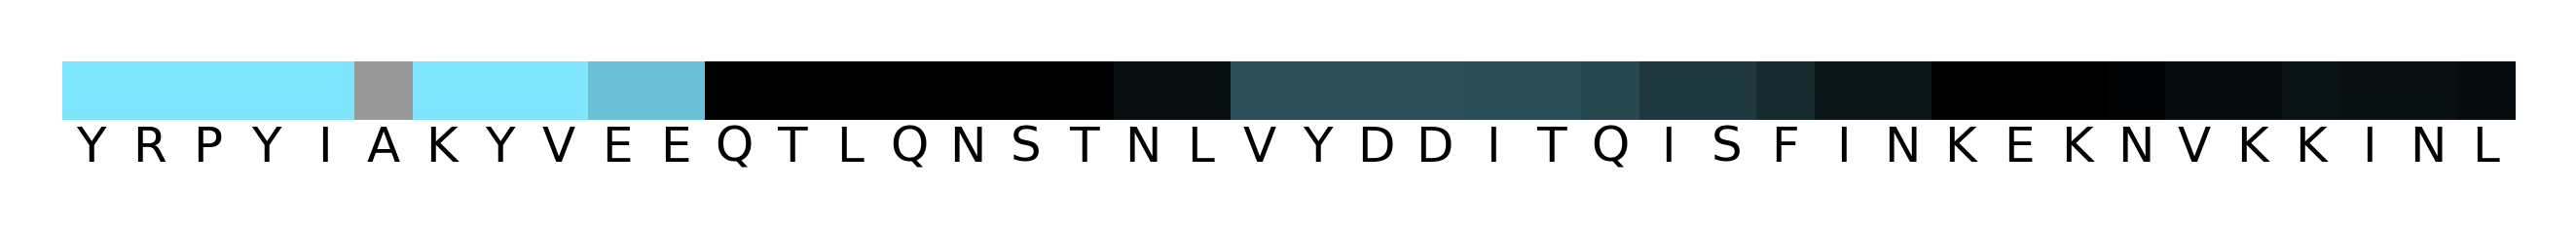

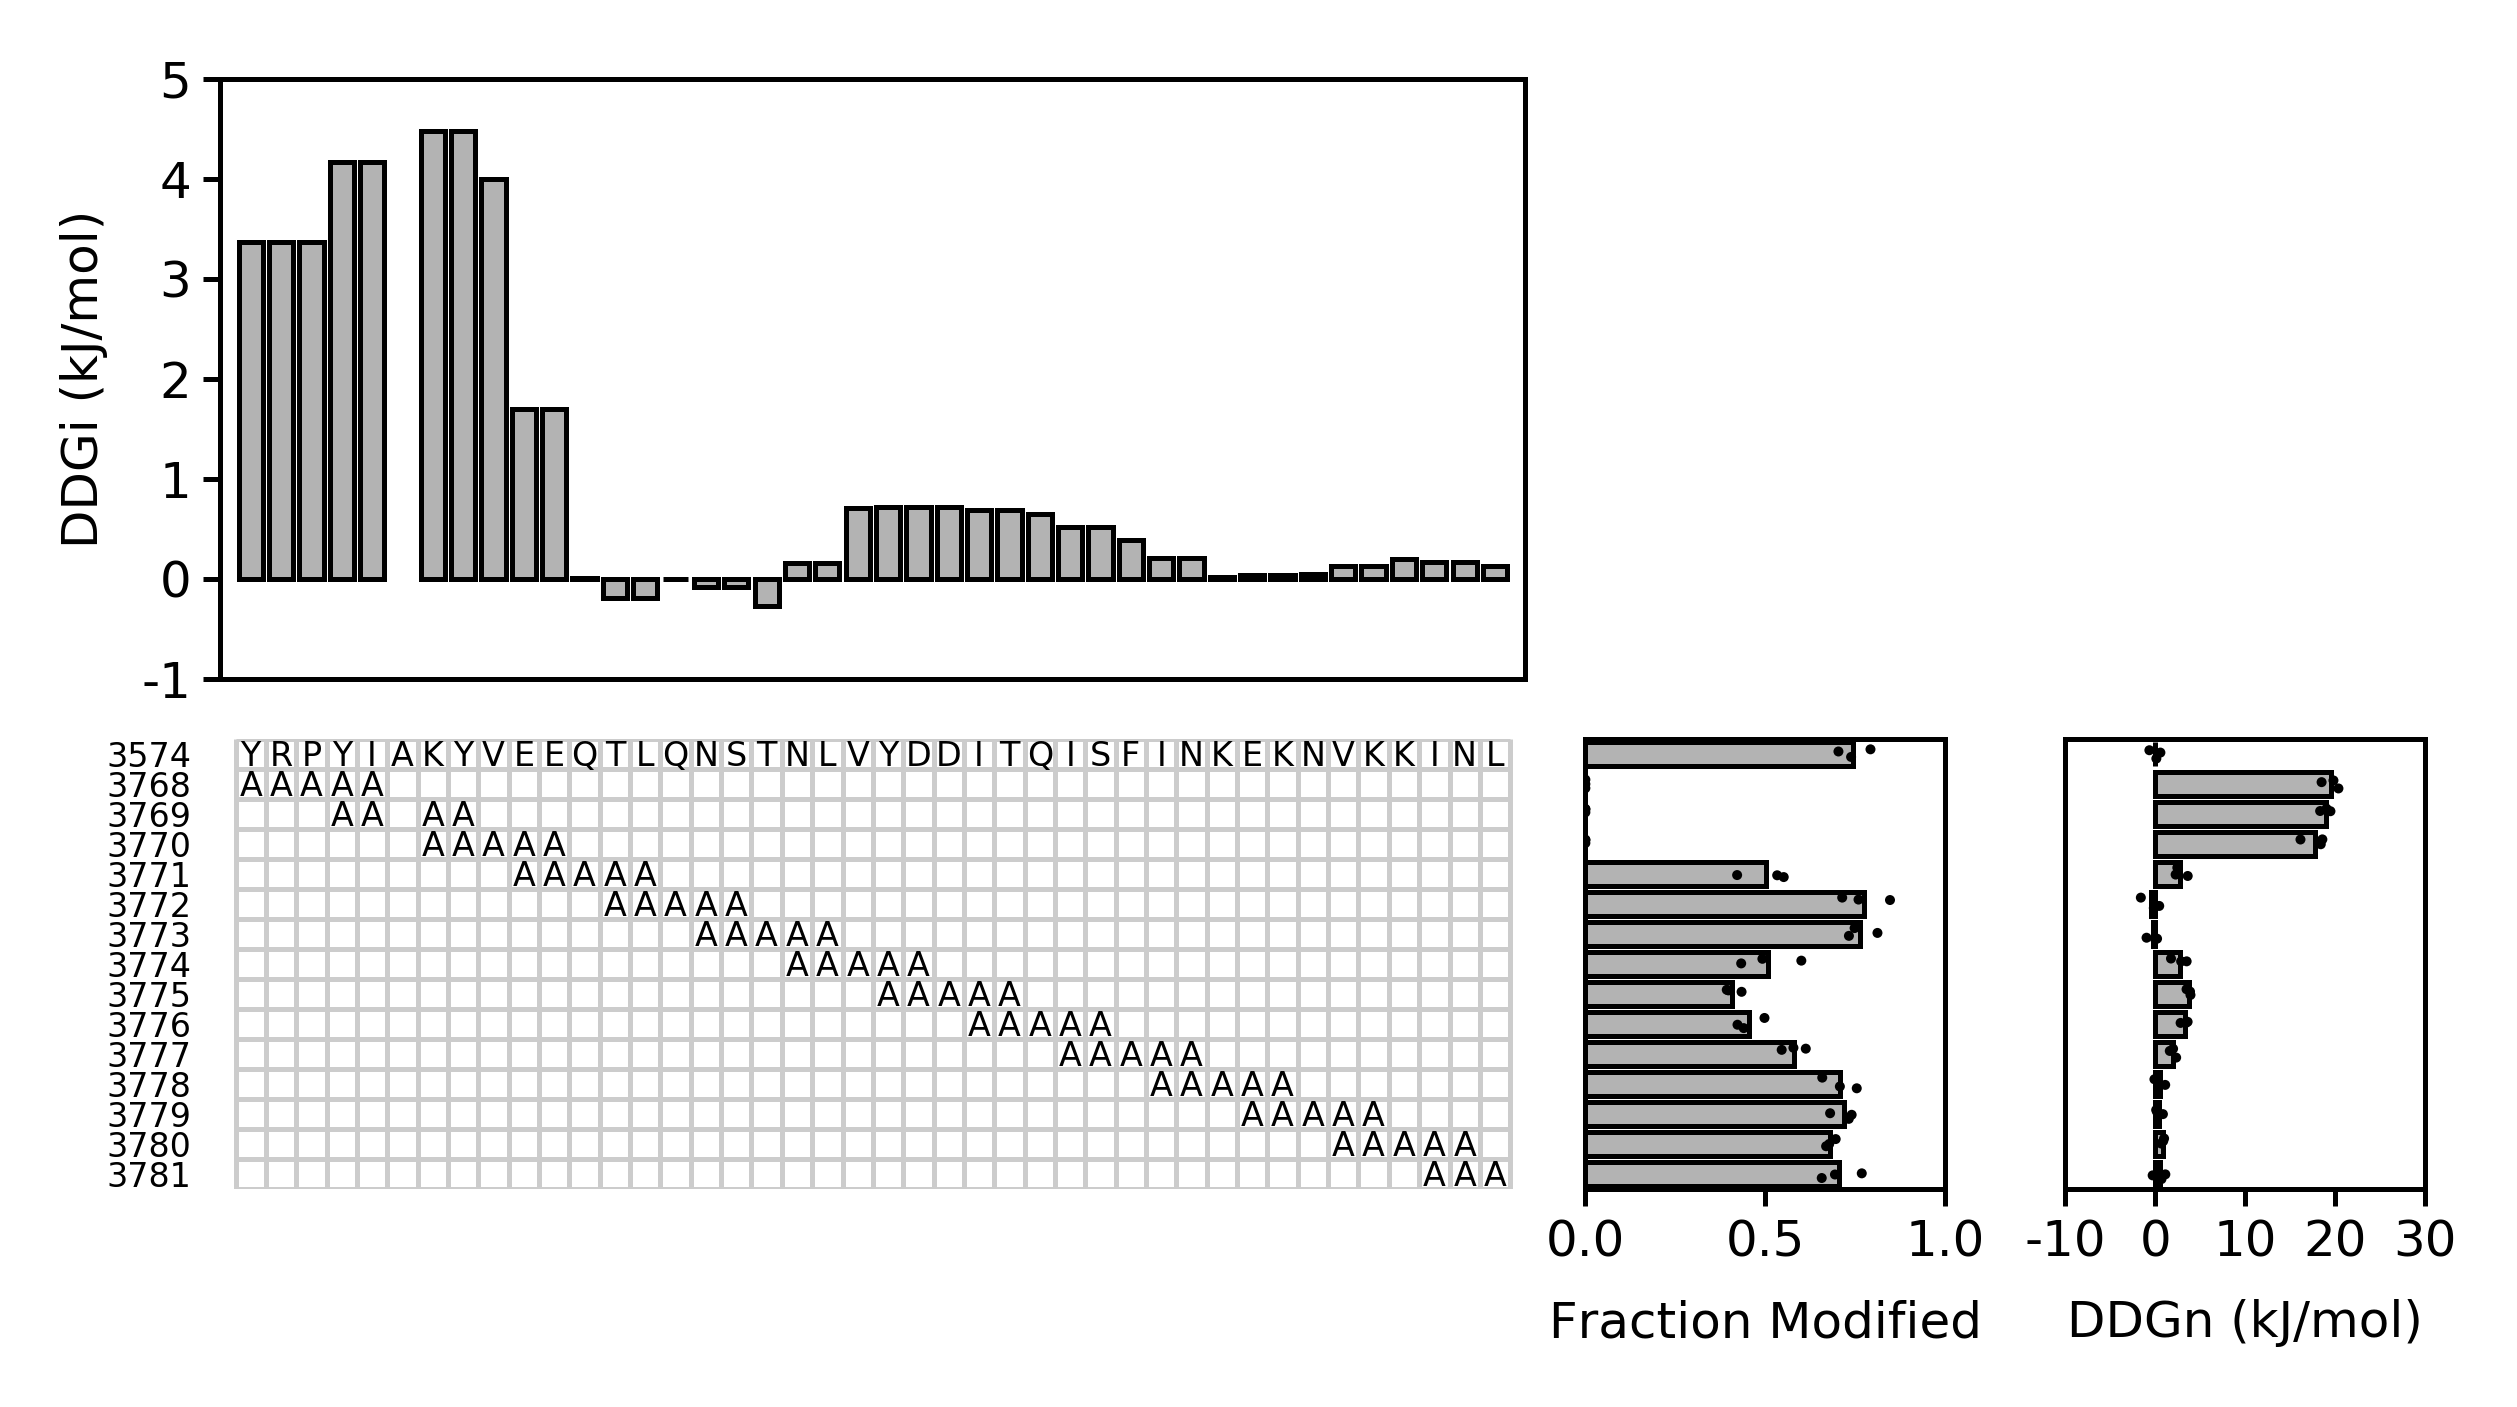

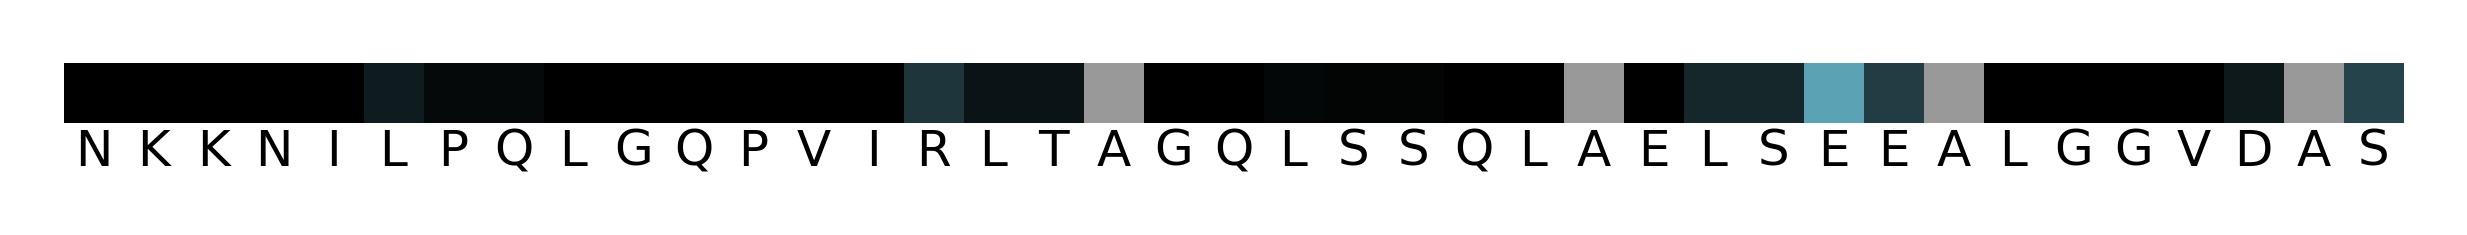

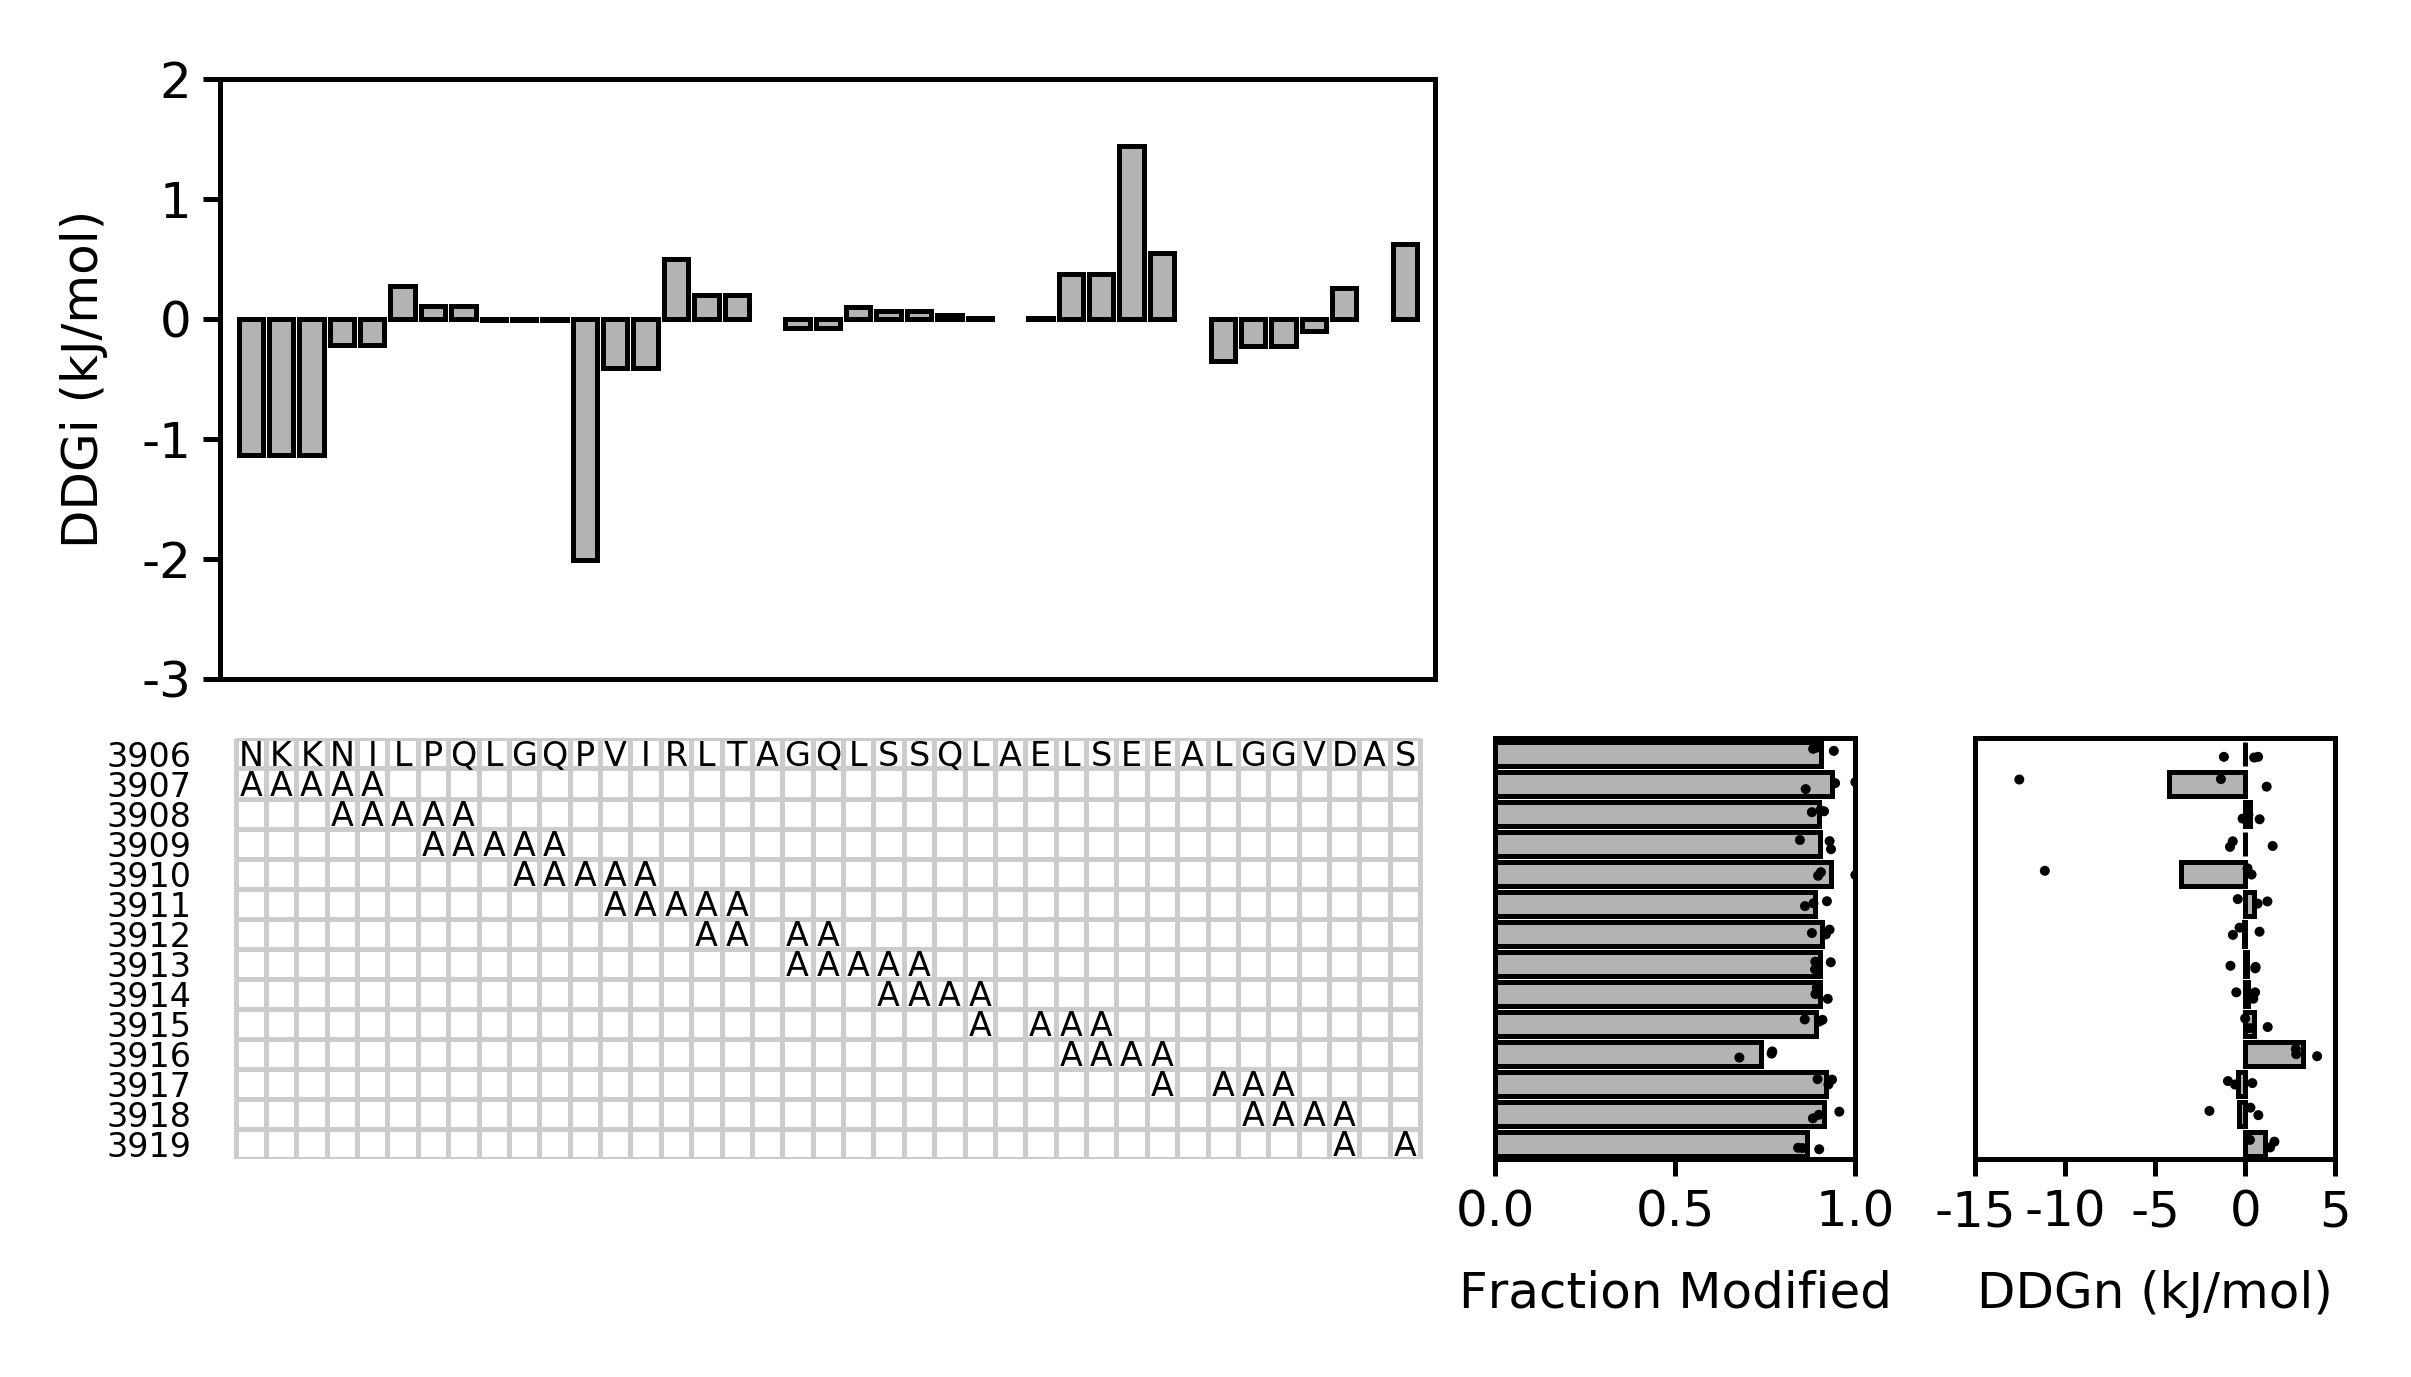

In [5]:
#plp
wt = 3162
pep_plasmids = list(range(3360,3383)) + [3384]#+ list(range(3384,3394))
core_length=23
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
wt_seq, ddgi_scores = da.ddgi(wt, extract_df)
dp.ddgi_heatmap(wt_seq, ddgi_scores, core_length=core_length)
plt.savefig("./matplotlib/plp_leader_heatmap.pdf")
dp.alanine_block_plot(extract_df, wt_seq, ddgi_scores, core_length=core_length)
plt.savefig("./matplotlib/plp_ablock_scan.pdf")
#paa
wt = 3132
pep_plasmids = list(range(3334,3340))
core_length=15
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
wt_seq, ddgi_scores = da.ddgi(wt, extract_df)
dp.ddgi_heatmap(wt_seq, ddgi_scores, core_length=core_length)
plt.savefig("./matplotlib/paa_leader_heatmap.pdf")
dp.alanine_block_plot(extract_df, wt_seq, ddgi_scores, core_length=core_length)
plt.savefig("./matplotlib/paa_ablock_scan.pdf")
#tgn
wt = 3574
pep_plasmids = list(range(3768,3782))
core_length=21
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
wt_seq, ddgi_scores = da.ddgi(wt, extract_df)
dp.ddgi_heatmap(wt_seq, ddgi_scores, core_length=core_length)
plt.savefig("./matplotlib/tgn_leader_heatmap.pdf")
dp.alanine_block_plot(extract_df, wt_seq, ddgi_scores, core_length=core_length)
plt.savefig("./matplotlib/tgn_ablock_scan.pdf")
#lyn
wt = 3906
pep_plasmids = list(range(3907,3920))
core_length=10
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
wt_seq, ddgi_scores = da.ddgi(wt, extract_df)
dp.ddgi_heatmap(wt_seq, ddgi_scores, core_length=core_length)
plt.savefig("./matplotlib/tru_leader_heatmap.pdf")
dp.alanine_block_plot(extract_df, wt_seq, ddgi_scores, core_length=core_length)
plt.savefig("./matplotlib/tru_ablock_scan.pdf")

# ANALZING SPACING VARIANTS

# Fitting k parameters and printing

In [6]:
#plp
optimal = 3162
pep_plasmids = [2775,2776,2777,2778,2779,2780]
extract_df = da.sub_pivot_df(pep_plasmids + [optimal], sldf, group=False)
k1, k2 = dp.spring_plot(extract_df, optimal, plot=False, print_stats=True)

#paaa
optimal = 3132
pep_plasmids = [3521, 3530]
extract_df = da.sub_pivot_df(pep_plasmids + [optimal], sldf, group=False)
k1, k2 = dp.spring_plot(extract_df, optimal, plot=False, print_stats=True)

#tgn
optimal = 3574
pep_plasmids = [3892,3893,3894,3895,3896,3902,3903,3904]
extract_df = da.sub_pivot_df(pep_plasmids + [optimal], sldf, group=False)
k1, k2 = dp.spring_plot(extract_df, optimal, plot=False, print_stats=True)

# lyn
optimal = 2768
pep_plasmids = [2769,2770,2771,2772,2773, 3906]
extract_df = da.sub_pivot_df(pep_plasmids + [optimal], sldf, group=False)
k1, k2 = dp.spring_plot(extract_df, optimal, plot=False, print_stats=True)

k1 7.570917664619524 k2 1310.073063448993
k1 5513.888125724929 k2 5818.868066731417
k1 110.28236021453318 k2 38.58320790321634
k1 5.156739100401223 k2 298.77447637902526


# Tweaked the fits a little, and plotting and saving the figures (figure 1f)

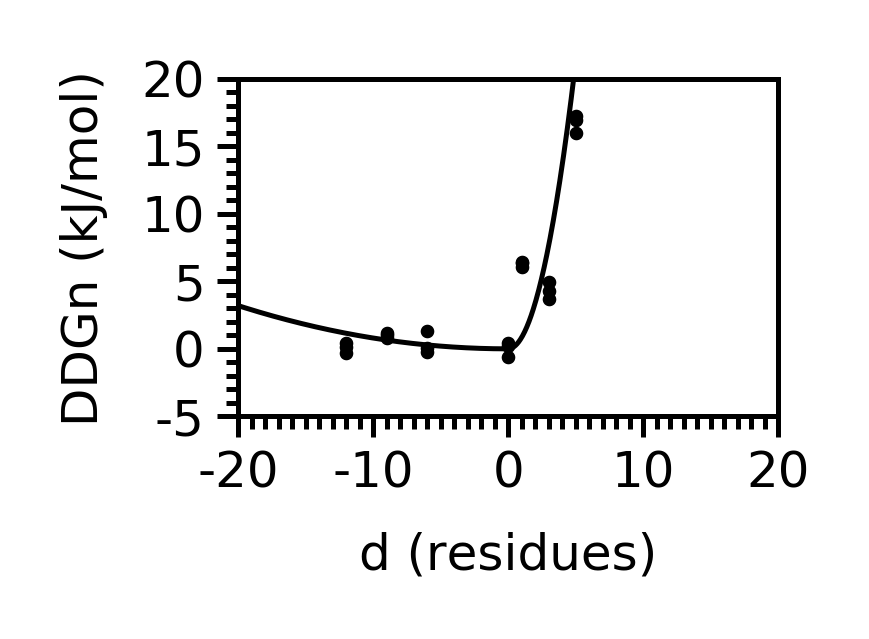

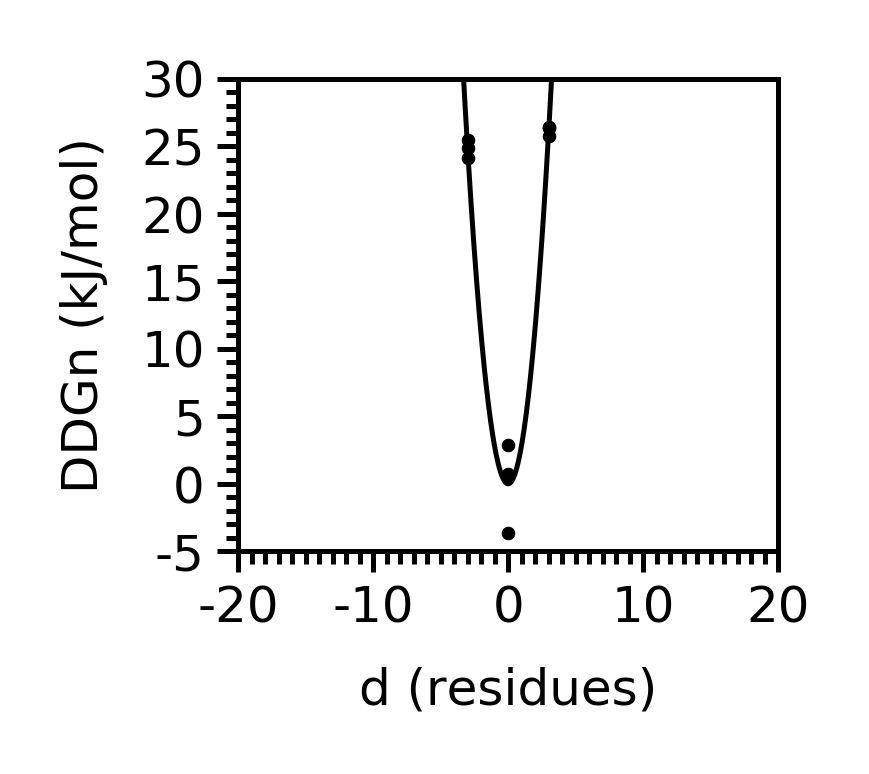

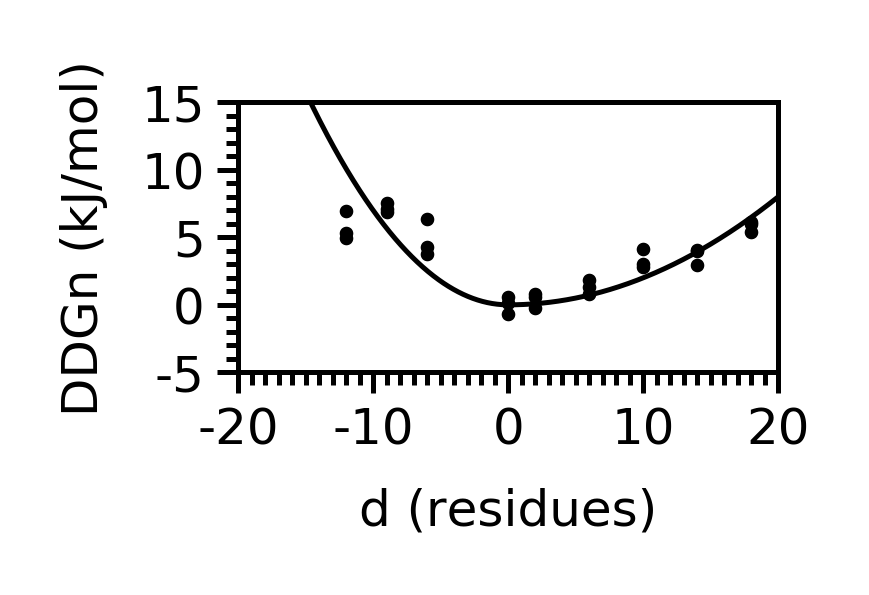

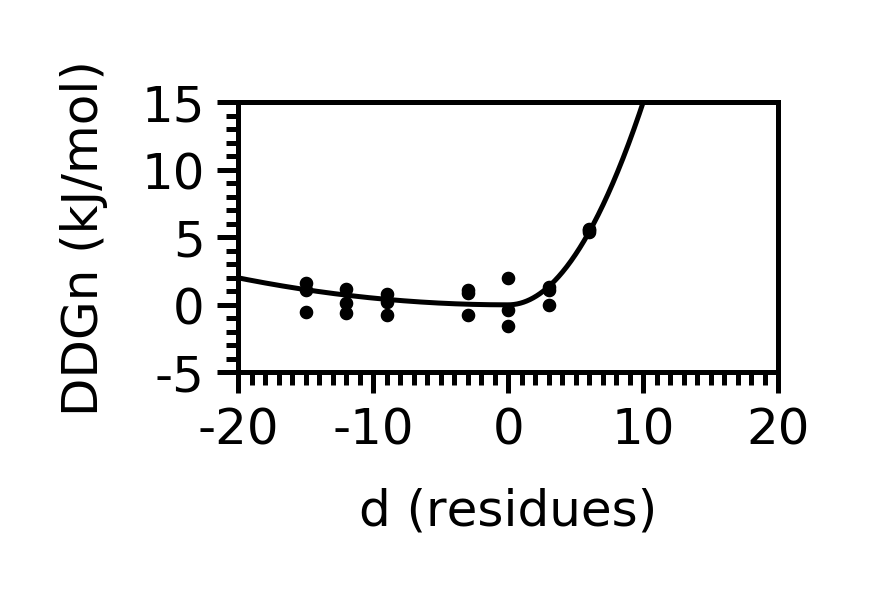

In [7]:
#plp
optimal = 3162
pep_plasmids = [2775,2776,2777,2778,2779,2780]
extract_df = da.sub_pivot_df(pep_plasmids + [optimal], sldf, group=False)
k1, k2 = dp.spring_plot(extract_df, optimal, k=(16,1700), plot=True)
plt.savefig('./matplotlib/plp_spacing_plot.pdf')
#paaa
optimal = 3132
pep_plasmids = [3521, 3530]
extract_df = da.sub_pivot_df(pep_plasmids + [optimal], sldf, group=False)
k1, k2 = dp.spring_plot(extract_df, optimal, k=(5500,5800), plot=True)
plt.savefig('./matplotlib/paa_spacing_plot.pdf')
#tgn
optimal = 3574
pep_plasmids = [3892,3893,3894,3895,3896,3902,3903,3904]
extract_df = da.sub_pivot_df(pep_plasmids + [optimal], sldf, group=False)
k1, k2 = dp.spring_plot(extract_df, optimal, k=(140,40), plot=True)
plt.savefig('./matplotlib/tgn_spacing_plot.pdf')
# lyn
optimal = 2768
pep_plasmids = [2769,2770,2771,2772,2773, 3906]
extract_df = da.sub_pivot_df(pep_plasmids + [optimal], sldf, group=False)
k1, k2 = dp.spring_plot(extract_df, optimal, k=(10,300), plot=True)
plt.savefig('./matplotlib/lyn_spacing_plot.pdf')

# Plotting and saving the figures for spacing/truncations for the leader dependent enzymes (Supp Notes)

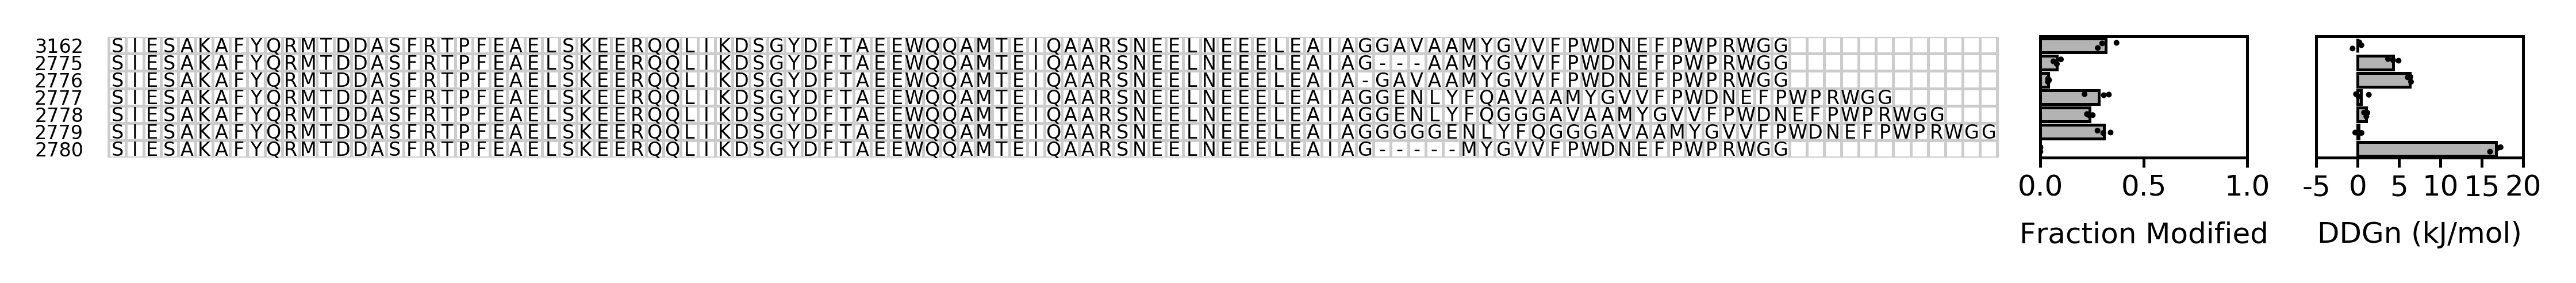

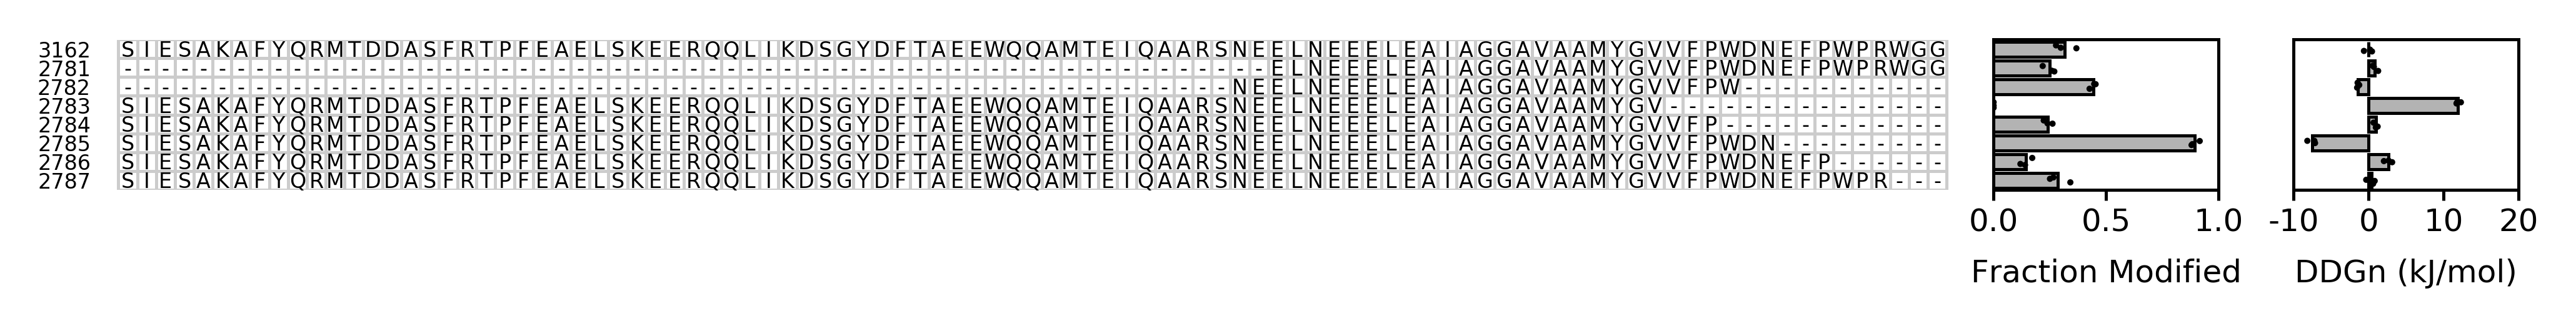

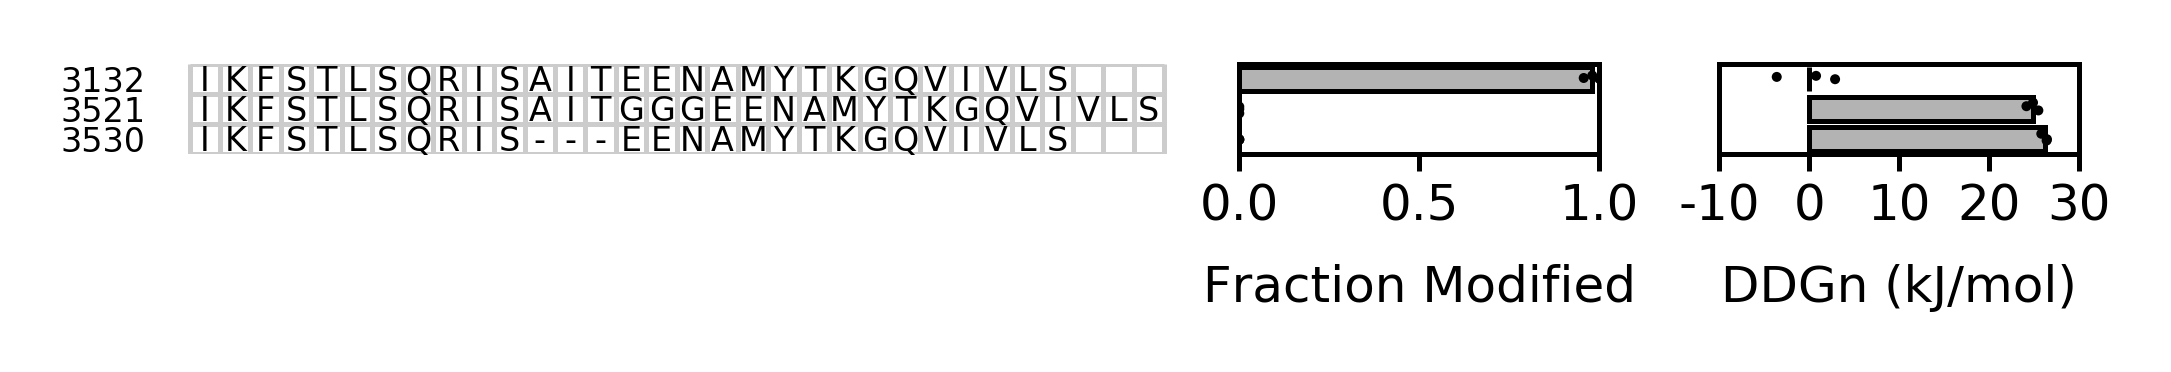

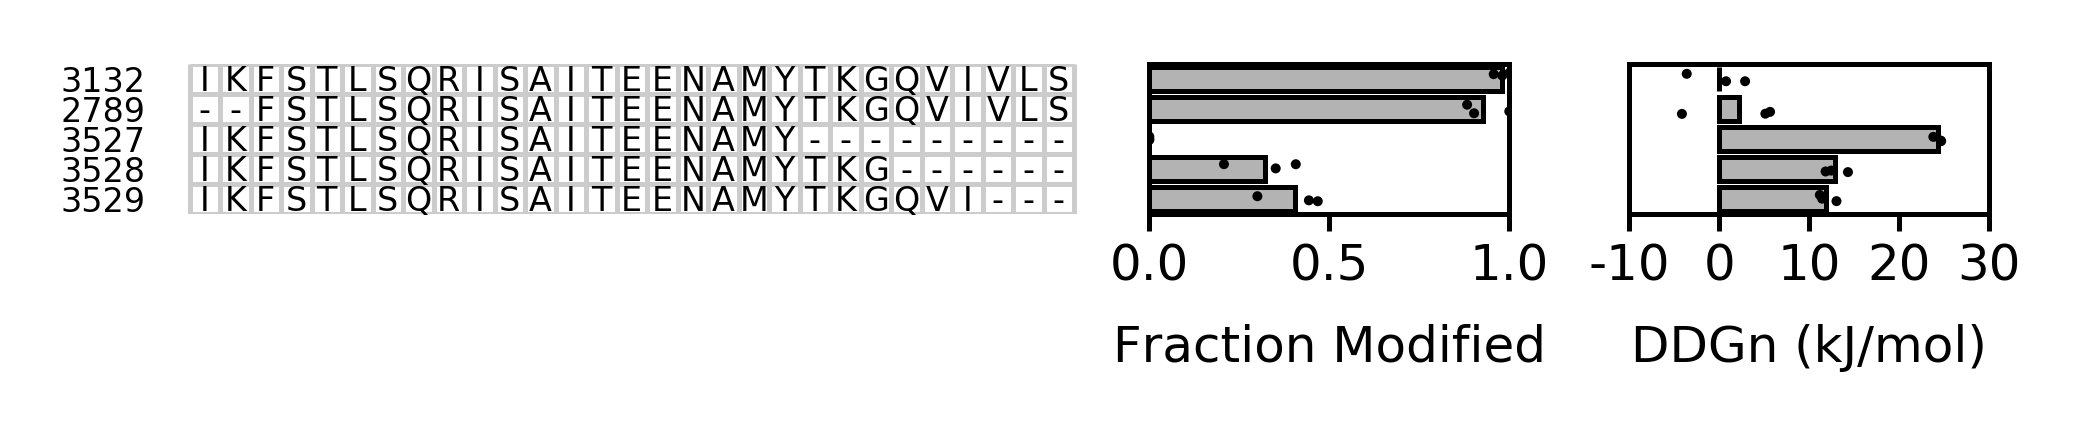

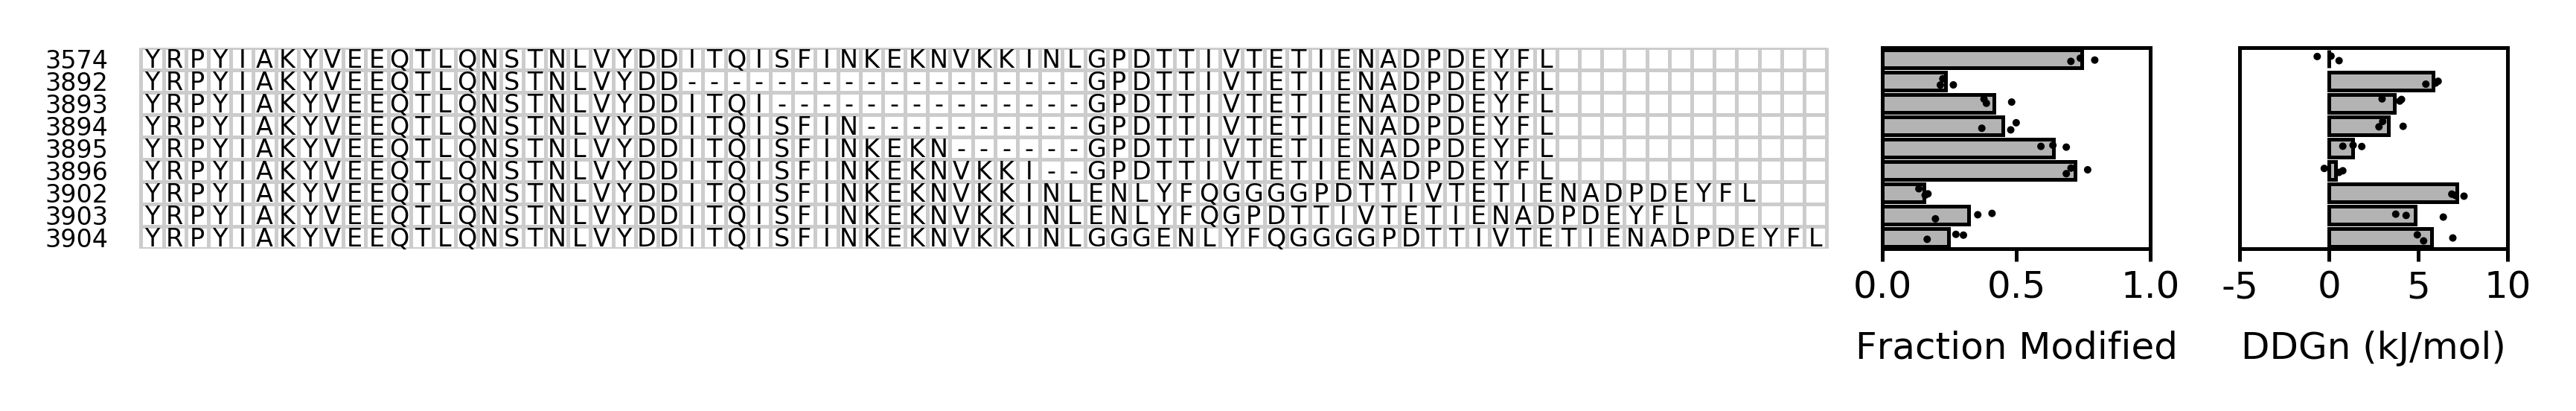

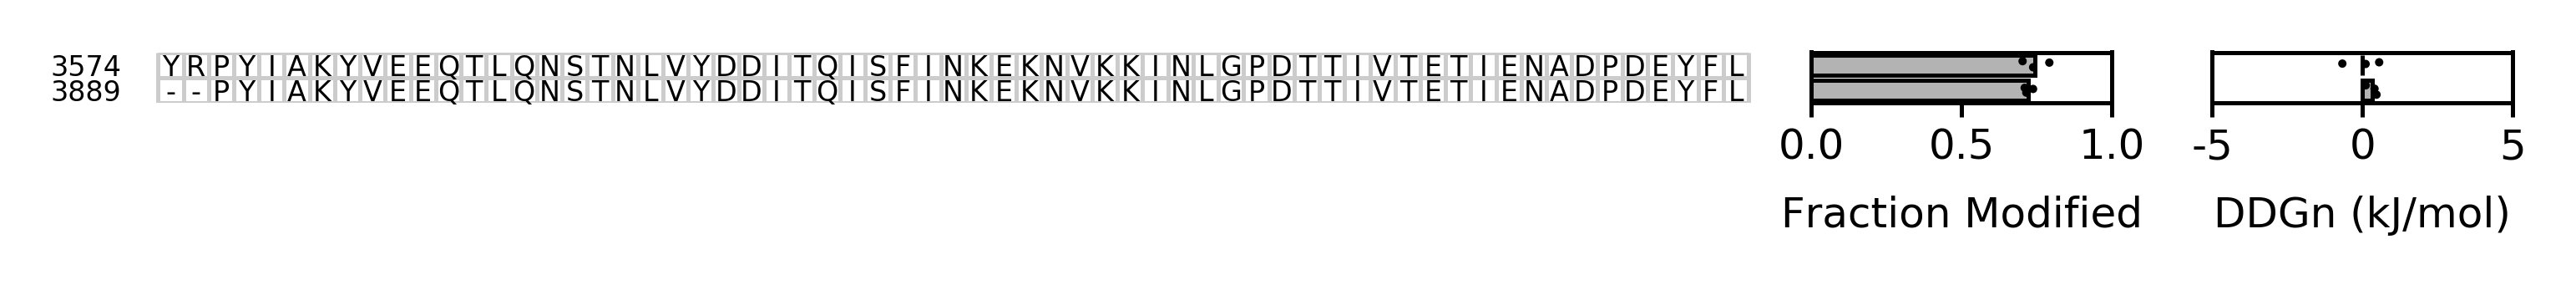

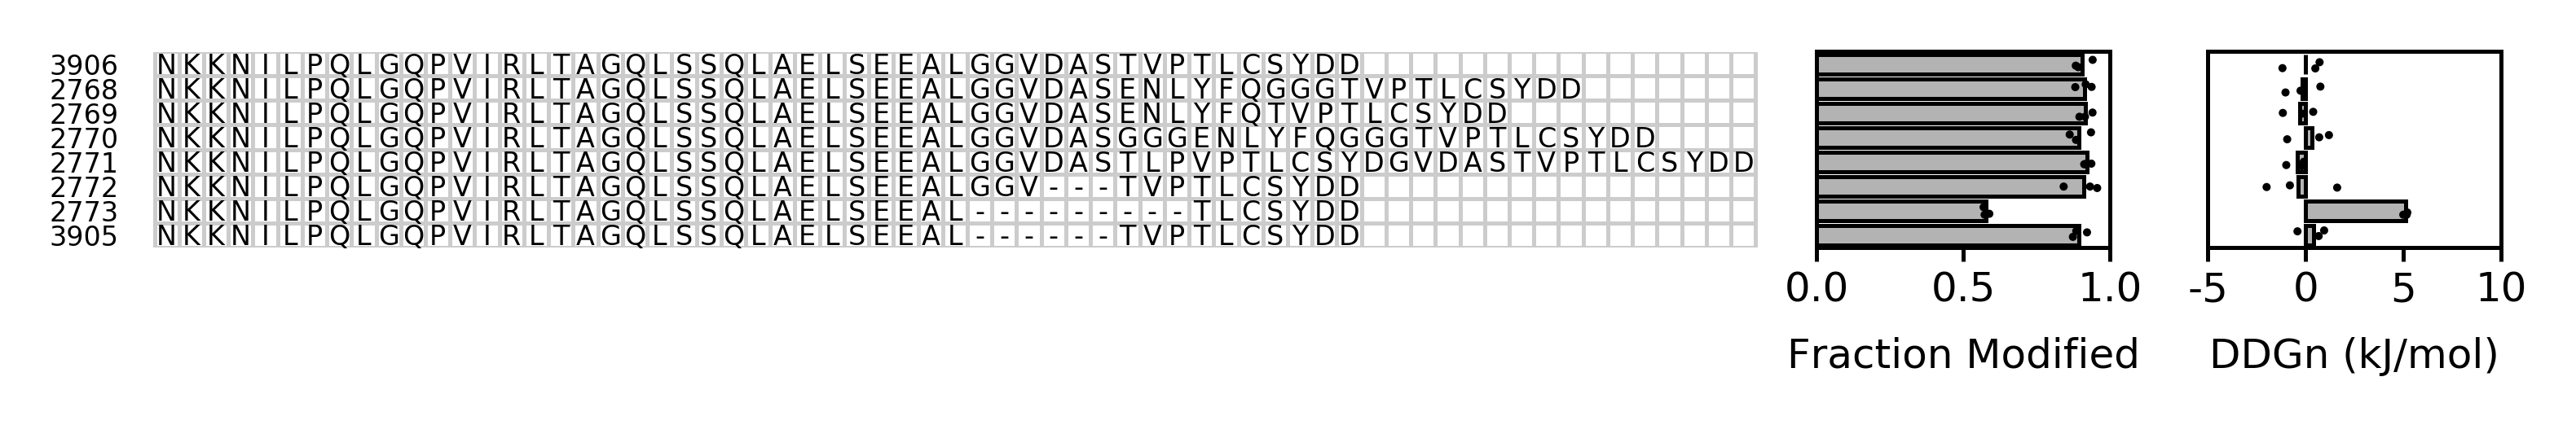

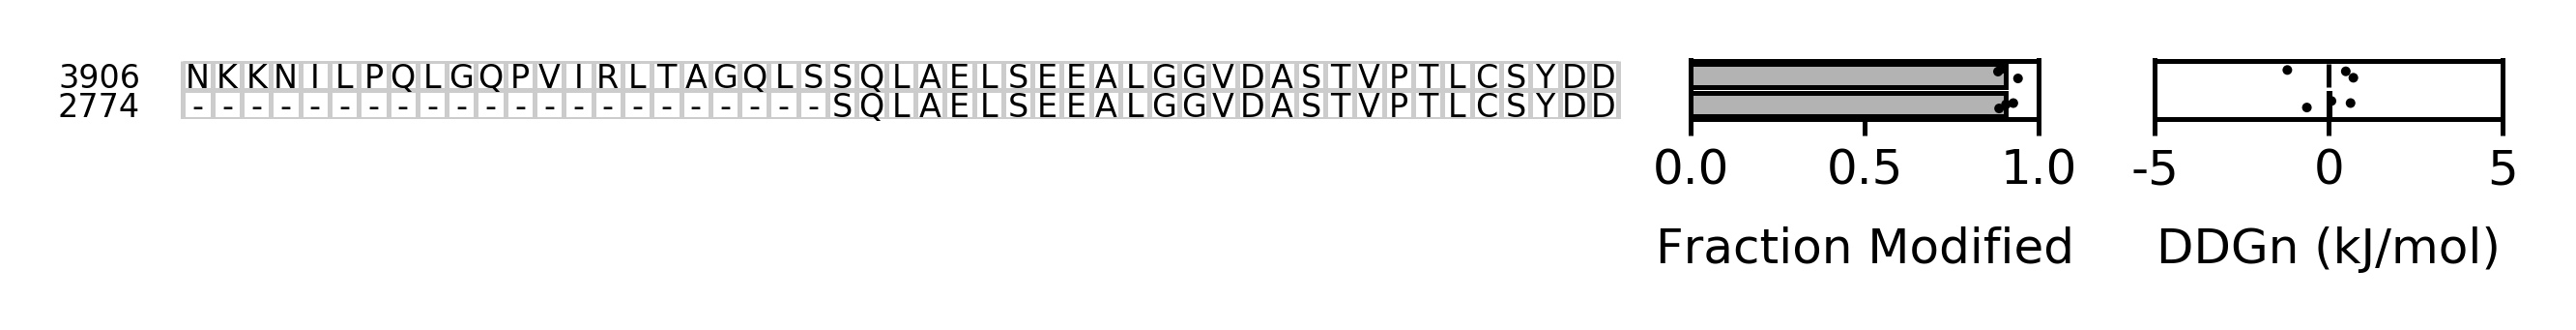

In [8]:
#plp spacing variants
wt = 3162
pep_plasmids = [2775,2776,2777,2778,2779,2780]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/plp_spacing_matrix.pdf')
#plp truncations
pep_plasmids = [2781,2782,2783,2784,2785,2786,2787]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/plp_truncation_matrix.pdf')
#paa spacing variants
wt = 3132
pep_plasmids = [3521, 3530]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/paa_spacing_matrix.pdf')
#paa truncations
pep_plasmids = [2789, 3527, 3528, 3529]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/paa_truncation_matrix.pdf')
#tgn spacing variants
wt = 3574
pep_plasmids = [3892,3893,3894,3895,3896,3902,3903,3904]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/tgn_spacing_matrix.pdf')
#tgn truncations
pep_plasmids = [3889]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/tgn_truncation_matrix.pdf')
#lyn spacing variants
wt = 3906
pep_plasmids = [3905,2768,2769,2770,2771,2772,2773]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/lyn_spacing_matrix.pdf')
#lyn truncations
pep_plasmids = [2774]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/lyn_truncation_matrix.pdf')

# Plotting and saving the figures for spacing/truncations for the leader INdependent enzymes (Supp Notes)

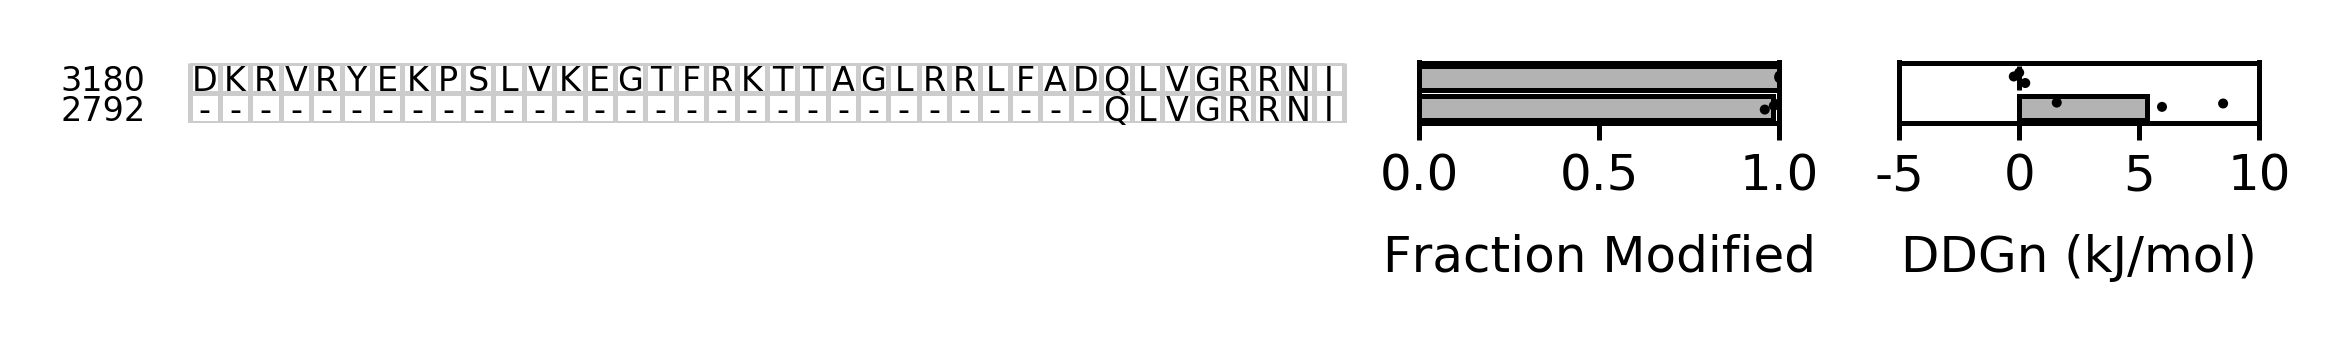

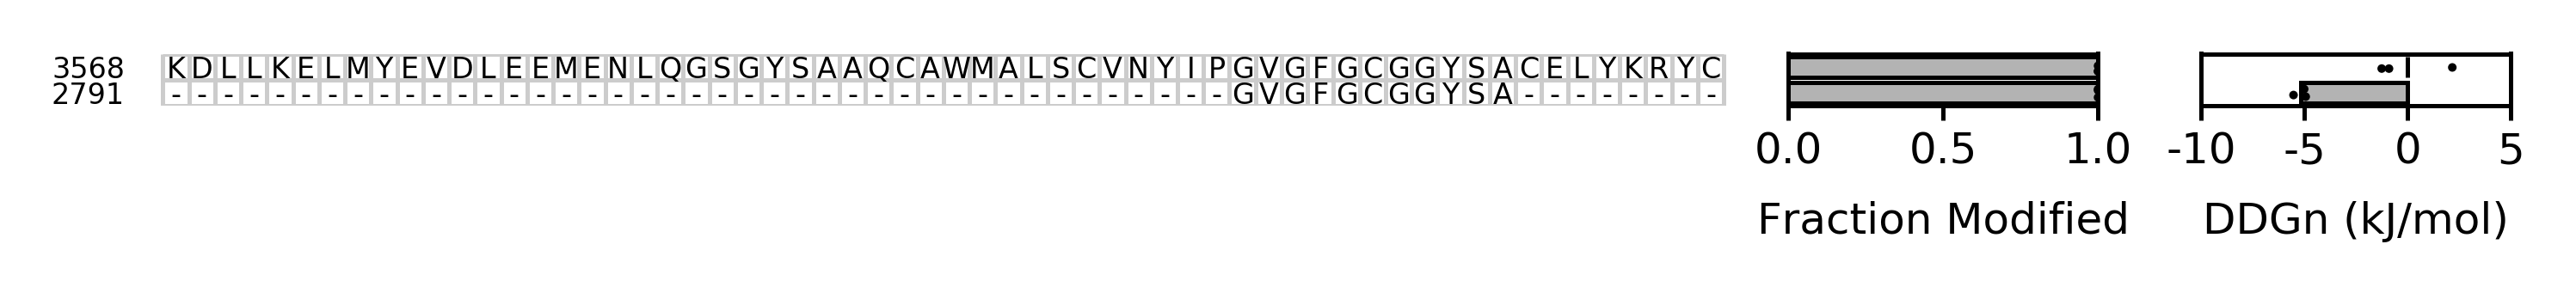

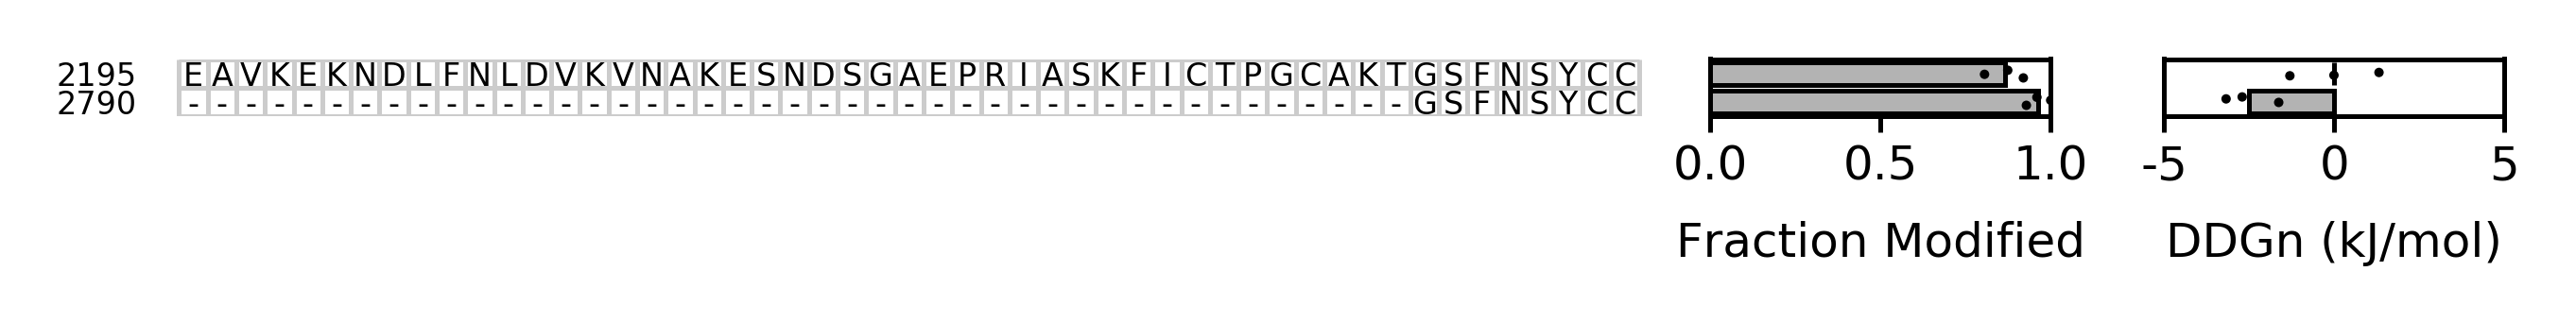

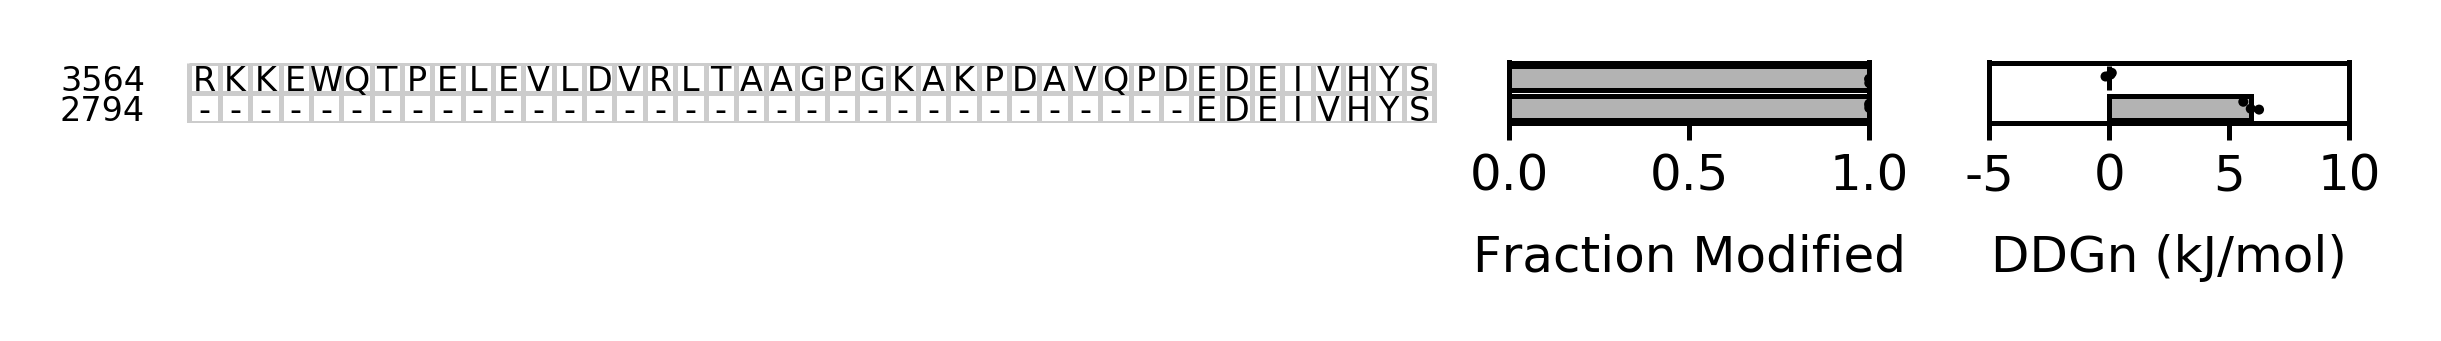

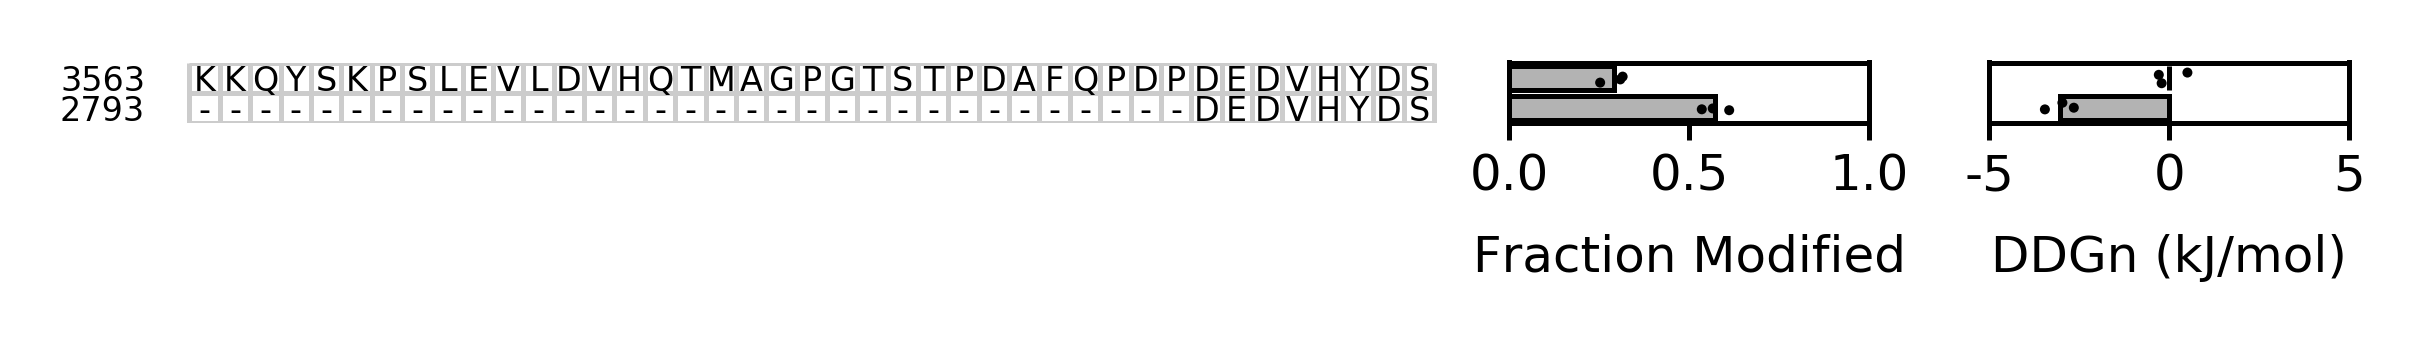

In [9]:
#lasf
wt = 3180
pep_plasmids = [2792]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/las_truncation_matrix.pdf')
#pals
wt = 3568
pep_plasmids = [2791]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/pal_truncation_matrix.pdf')
#epi
wt = 2195
pep_plasmids = [2790]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/epi_truncation_matrix.pdf')
#thcok
wt = 3564
pep_plasmids = [2794]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/thco_truncation_matrix.pdf')
#padek
wt = 3563
pep_plasmids = [2793]
extract_df = da.sub_pivot_df(pep_plasmids + [wt], sldf, group=False)
dp.alignment_plot(extract_df, wt)
plt.savefig('./matplotlib/pade_truncation_matrix.pdf')